<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Battle-of-Neighborhoods:-Capstone-Project" data-toc-modified-id="The-Battle-of-Neighborhoods:-Capstone-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Battle of Neighborhoods: Capstone Project</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li></ul></div>

# The Battle of Neighborhoods: Capstone Project

## Introduction

Today people are more and more attentive to their physical appearance, and spend many hours a week training.  
The main place to do physical activity are the gyms, in the gym thanks to the guidance of an expert coach you can achieve results faster, moreover the gyms are a great place to meet other people.  
The purpose of this project is to analyze and select the best locations in the city of Palermo, in Italy, to open a new gym.  
Using data science methodology and machine learning techniques like clustering, we will carry out the geospatial analysis of the city of Palermo to understand what would be the best place to open a new gym.
The population of Palermo urban area is estimated by Eurostat to be 855,285, while its metropolitan area is the fifth most populated in Italy with around 1.2 million people. In the central area, the city has a population of around 676,000 people. 

## Data

To solve the problem, we will need the following data:  
1. List of neighbourhoods in Palermo.  
2. Latitude and longitude coordinates of those neighbourhoods. This is required in order to plot the map and also to get the venue data  
3. Venue data, particularly data related to gyms. We will use this data to perform clustering on the neighbourhoods.

From Wikipedia https://it.wikipedia.org/wiki/Circoscrizioni_di_Palermo, we collect data relating to the subdivision of the city, the surface and the population of each subdivision, and we use that data to create a dataset.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np
import folium 
import matplotlib.pyplot as plt
import geocoder

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [2]:
Palermo = pd.DataFrame({'borough': ['I', 'II','III','IV','V','VI','VII','VIII'],
                        'population': [23384, 72888, 73509,104448,113425,73895,76671,119341],
                        'area [ettari]': [249.7, 2139.0, 2034.7, 2616.3, 1753.1, 2390.0, 3295.5, 1532.7]}, 
                        columns=['borough', 'population','area [ettari]'])

In [3]:
Palermo

,borough,population,area [ettari]
0,I,23384,249.7
1,II,72888,2139.0
2,III,73509,2034.7
3,IV,104448,2616.3
4,V,113425,1753.1
5,VI,73895,2390.0
6,VII,76671,3295.5
7,VIII,119341,1532.7


let's create a new feature containing the population density

In [4]:
Palermo['population density']= Palermo['population']/Palermo['area [ettari]']

In [5]:
Palermo

,borough,population,area [ettari],population density
0,I,23384,249.7,93.648378
1,II,72888,2139.0,34.075736
2,III,73509,2034.7,36.127685
3,IV,104448,2616.3,39.922027
4,V,113425,1753.1,64.699675
5,VI,73895,2390.0,30.918410
6,VII,76671,3295.5,23.265362
7,VIII,119341,1532.7,77.863248


In [6]:
Palermo.describe()

,population,area [ettari],population density
count,8.00000,8.000000,8.000000
mean,82195.12500,2001.375000,50.065065
std,30637.37066,892.319201,25.422220
min,23384.00000,249.700000,23.265362
25%,73353.75000,1698.000000,33.286405
50%,75283.00000,2086.850000,38.024856
75%,106692.25000,2446.575000,67.990568
max,119341.00000,3295.500000,93.648378


Text(0.5, 1.0, 'population density')

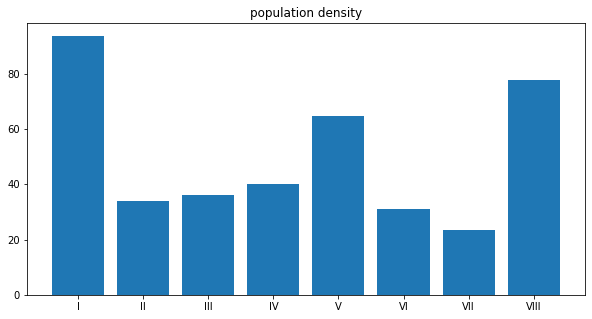

In [7]:
plt.figure(figsize=(10,5))
plt.bar(Palermo['borough'],Palermo['population density'])
plt.title('population density')

We select only the districts where the population density exceeds the average

In [8]:
Palermo[Palermo['population density'] > Palermo['population density'].mean()]

,borough,population,area [ettari],population density
0,I,23384,249.7,93.648378
4,V,113425,1753.1,64.699675
7,VIII,119341,1532.7,77.863248


Always from Wikipedia https://it.wikipedia.org/wiki/Circoscrizioni_di_Palermo we collect data relating to the Neighborhoods for the borough I, V, VIII

In [9]:
Neighborhoods = pd.DataFrame({'borough': ['I', 'I','V','V','V','V','VIII','VIII','VIII','VIII'],
                        'neighborhoods': ['Tribunali-Castellammare', 'Palazzo Reale-Monte di Pietà','Zisa','Uditore-Passo di Rigano','Noce', 'Borgo Nuovo','Politeama','Libertà', 'Montepellegrino','Malaspina-Palagonia']},
                        columns= ['borough', 'neighborhoods'])

In [10]:
Neighborhoods

,borough,neighborhoods
0,I,Tribunali-Castellammare
1,I,Palazzo Reale-Monte di Pietà
2,V,Zisa
3,V,Uditore-Passo di Rigano
4,V,Noce
5,V,Borgo Nuovo
6,VIII,Politeama
7,VIII,Libertà
8,VIII,Montepellegrino
9,VIII,Malaspina-Palagonia


In [11]:
Neighborhood = ['Tribunali','Palazzo Reale','Zisa','Uditore-Passo di Rigano',
               'Borgo Nuovo','Politeama','Libertà','Montepellegrino','Malaspina']

Borough=  ['I', 'I','V','V','V','VIII','VIII','VIII','VIII']
Latitude = ['','','','','','','','','']
Longitude = ['','','','','','','','','']

df_palermo = {'Borough': Borough,'Neighborhood': Neighborhood,'Latitude': Latitude,'Longitude':Longitude}
df_palermo= pd.DataFrame(data=df_palermo, columns=['Borough','Neighborhood','Latitude', 'Longitude'], index=None)

df_palermo

,Borough,Neighborhood,Latitude,Longitude
0,I,Tribunali,,
1,I,Palazzo Reale,,
2,V,Zisa,,
3,V,Uditore-Passo di Rigano,,
4,V,Borgo Nuovo,,
5,VIII,Politeama,,
6,VIII,Libertà,,
7,VIII,Montepellegrino,,
8,VIII,Malaspina,,


we use the geocoder library to derive the latitude and longitude of each Neighborhood

In [12]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},Palermo'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="user",timeout=10)
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[38.1185781, 38.1089206, 38.1167741, 38.1273201, 38.1291058, 38.1246589, 38.1392271, 38.139013, 38.1275421] [13.351956986431173, 13.3540743, 13.341055144774542, 13.3182941, 13.2946766, 13.3555208, 13.3463061, 13.3583234, 13.3422548]


In [13]:
df_palermo = {'Borough': Borough,'Neighborhood': Neighborhood,'Latitude': Latitude,'Longitude':Longitude}
df_palermo= pd.DataFrame(data=df_palermo, columns=['Borough','Neighborhood','Latitude', 'Longitude'], index=None)

df_palermo

,Borough,Neighborhood,Latitude,Longitude
0,I,Tribunali,38.118578,13.351957
1,I,Palazzo Reale,38.108921,13.354074
2,V,Zisa,38.116774,13.341055
3,V,Uditore-Passo di Rigano,38.127320,13.318294
4,V,Borgo Nuovo,38.129106,13.294677
5,VIII,Politeama,38.124659,13.355521
6,VIII,Libertà,38.139227,13.346306
7,VIII,Montepellegrino,38.139013,13.358323
8,VIII,Malaspina,38.127542,13.342255


Get the co-ordinates of Palermo


In [14]:
address = 'Palermo, italy'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Palermo, Italy are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Palermo, Italy are 38.1112268, 13.3524434.


 Now We use Foursquare for derive the Gym in Palermo

 Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = 'private'
CLIENT_SECRET = 'private' 
VERSION = 'private' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


Create a function for derve all the venue in Neighborhood

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now we use che Category ID for GYM = 4bf58dd8d48988d175941735

In [21]:
# type your answer here
categoryId='4bf58dd8d48988d175941735' 
Palermo_gym = getNearbyVenues(names=df_palermo['Neighborhood'],
                                   latitudes=df_palermo['Latitude'],
                                   longitudes=df_palermo['Longitude']
                                  )

Tribunali
Palazzo Reale
Zisa
Uditore-Passo di Rigano
Borgo Nuovo
Politeama
Libertà
Montepellegrino
Malaspina


In [22]:
Palermo_gym

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tribunali,38.118578,13.351957,Paradisea,38.122446,13.351343,Yoga Studio
1,Palazzo Reale,38.108921,13.354074,Marte Club,38.105303,13.353556,Gym
2,Palazzo Reale,38.108921,13.354074,Gay,38.112378,13.352096,Track
3,Zisa,38.116774,13.341055,metabolica,38.113922,13.340920,Gym
4,Zisa,38.116774,13.341055,Palestra Metabolica,38.113749,13.341366,Gym
5,Zisa,38.116774,13.341055,A.S.D. Jogging,38.113158,13.341767,Gym
6,Politeama,38.124659,13.355521,Body Studio City Center,38.123629,13.354908,Gym / Fitness Center
7,Politeama,38.124659,13.355521,Dakar fitness club,38.125699,13.357197,Gym
8,Politeama,38.124659,13.355521,Paradisea,38.122446,13.351343,Yoga Studio
9,Libertà,38.139227,13.346306,Omnia Fitness,38.136677,13.344625,Gym / Fitness Center


In [ ]:
Now We have the Dataset with all the data that we need.